In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import os
if os.getcwd().endswith('notebooks'):
  os.chdir('..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [16]:
model_name = '001-rnn'

with open(f'./models/{model_name}_meta.json') as f:
  model_data = json.load(f)

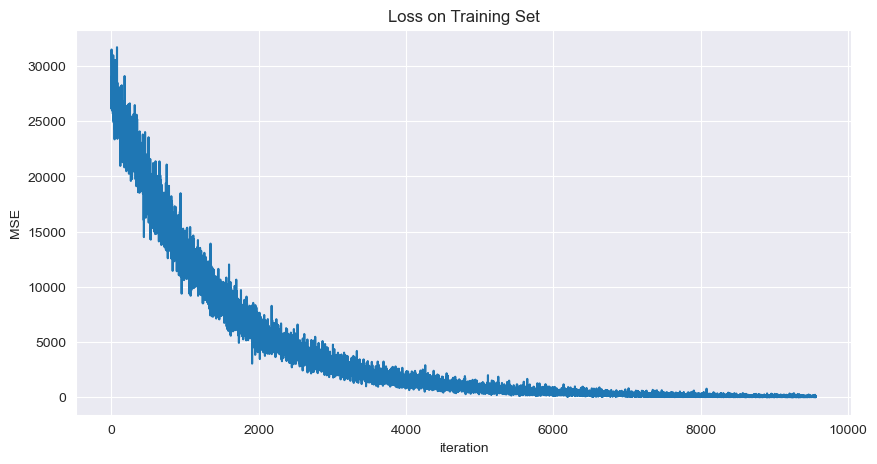

In [17]:
plt.figure(figsize=(10, 5))
sns.lineplot(model_data['loss'])
plt.title('Loss on Training Set')
plt.xlabel('iteration')
plt.ylabel('MSE')
plt.show()

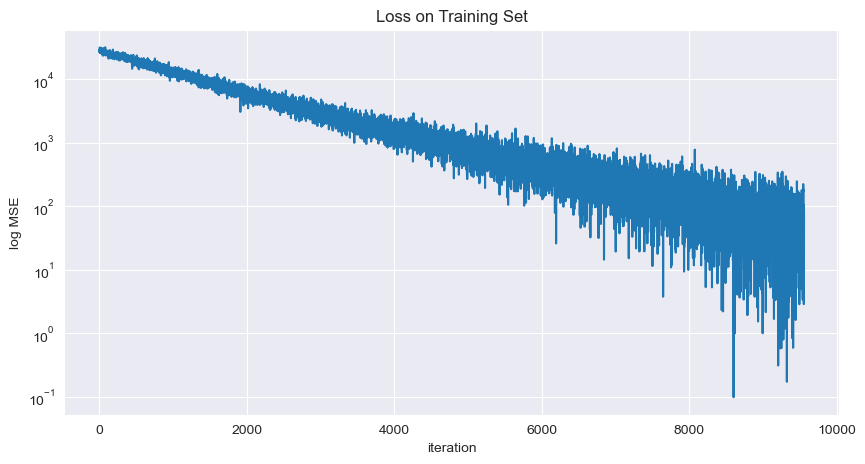

In [18]:
plt.figure(figsize=(10, 5))
sns.lineplot(model_data['loss'])
plt.title('Loss on Training Set')
plt.xlabel('iteration')
plt.ylabel('log MSE')
plt.yscale('log')
plt.show()

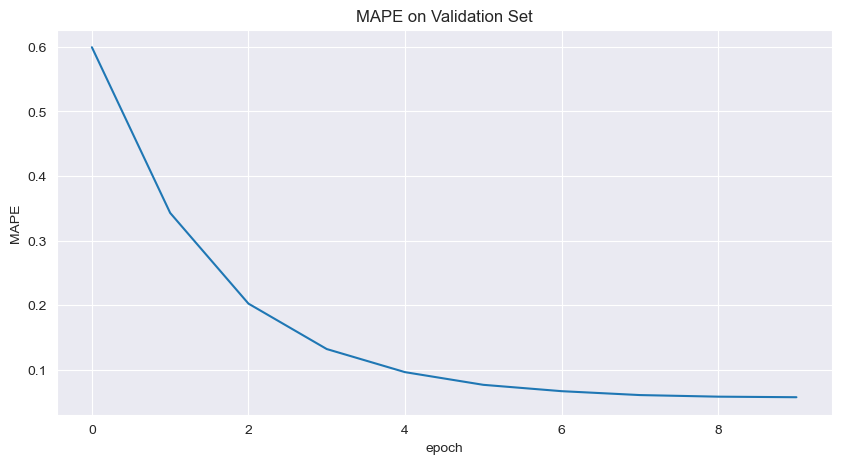

In [19]:
metric = 'mape'

plt.figure(figsize=(10, 5))
sns.lineplot(model_data['val_scores'][metric])
plt.title(metric.upper() + ' on Validation Set')
plt.xlabel('epoch')
plt.ylabel(metric.upper())
plt.show()

Numerical metrics

In [22]:
# Extract relevant metrics
best_epoch = model_data['best_epoch']
training_losses = model_data['loss']
val_scores = model_data['val_scores']

# Get MAPE and loss at the best epoch
best_mape = val_scores['mape'][best_epoch]
best_loss = training_losses[best_epoch]

# Print metrics for comparison
print(f"Model: {model_name}")
print(f"Best Epoch: {best_epoch}")
print(f"Training Loss at Best Epoch: {best_loss:.4f}")
print(f"Validation MAPE at Best Epoch: {best_mape:.4f}")

Model: 001-rnn
Best Epoch: 9
Training Loss at Best Epoch: 28924.8203
Validation MAPE at Best Epoch: 0.0571


Aggregate Metrics for Comparison

In [24]:
mean_mape = np.mean(val_scores['mape'])
std_mape = np.std(val_scores['mape'])

print(f"Mean Validation MAPE: {mean_mape:.4f}")
print(f"Standard Deviation of Validation MAPE: {std_mape:.4f}")

Mean Validation MAPE: 0.1690
Standard Deviation of Validation MAPE: 0.1671


Worst-case Performance

In [29]:
max_mape = np.max(val_scores['mape'])
print(f"Worst-case Validation MAPE: {max_mape:.4f}")

Worst-case Validation MAPE: 0.5996


Comparison Table

In [25]:
models_metrics = [
  {"model": "001-rnn", "best_epoch": best_epoch, "best_loss": best_loss, "best_mape": best_mape},
  # Add data for other models here
]

# Display as a pandas DataFrame
df_metrics = pd.DataFrame(models_metrics)
print(df_metrics)


     model  best_epoch     best_loss  best_mape
0  001-rnn           9  28924.820312   0.057065


# Using Functions in scr.evaluation.py

In [26]:
import os
if os.getcwd().endswith('notebooks'):
  os.chdir('..')

from src.evaluation import model_evaluation_plots, model_evaluation_numeric, model_comparison_table

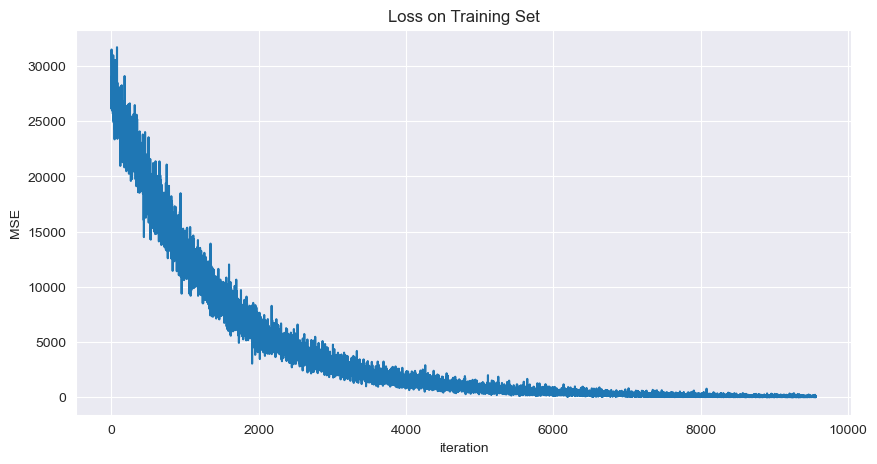

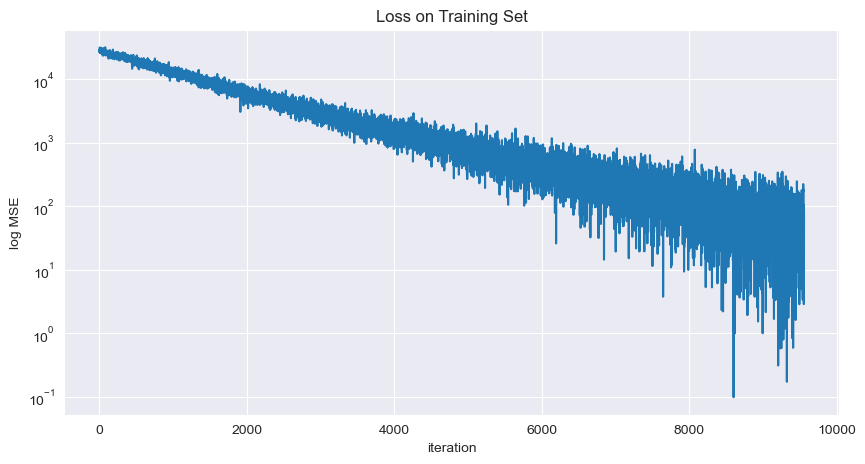

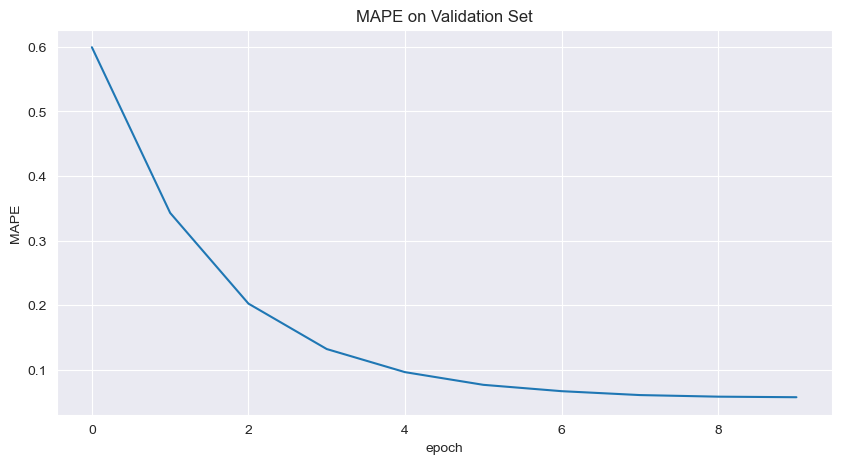

In [27]:
model_evaluation_plots("001-rnn")

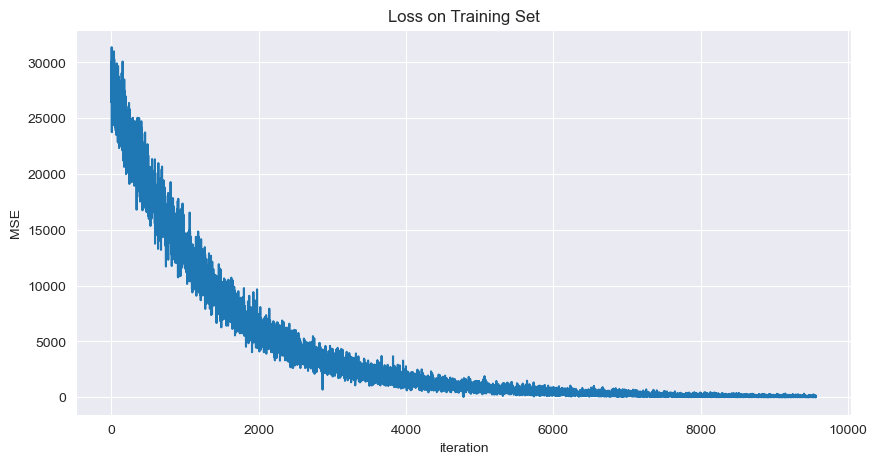

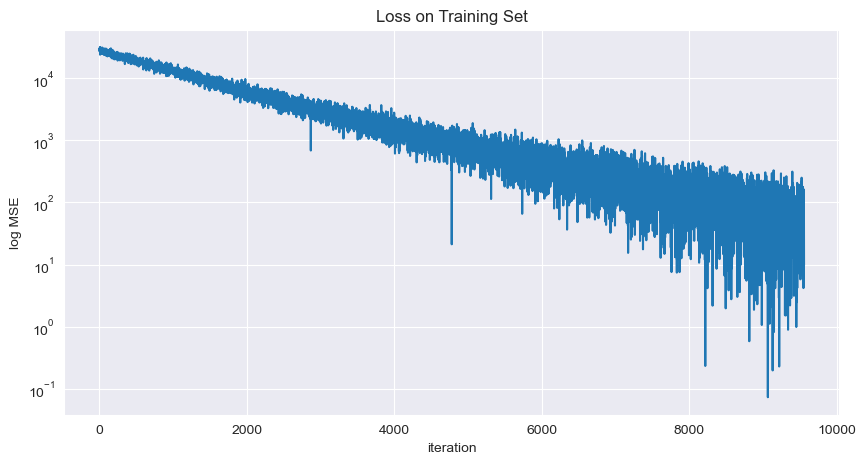

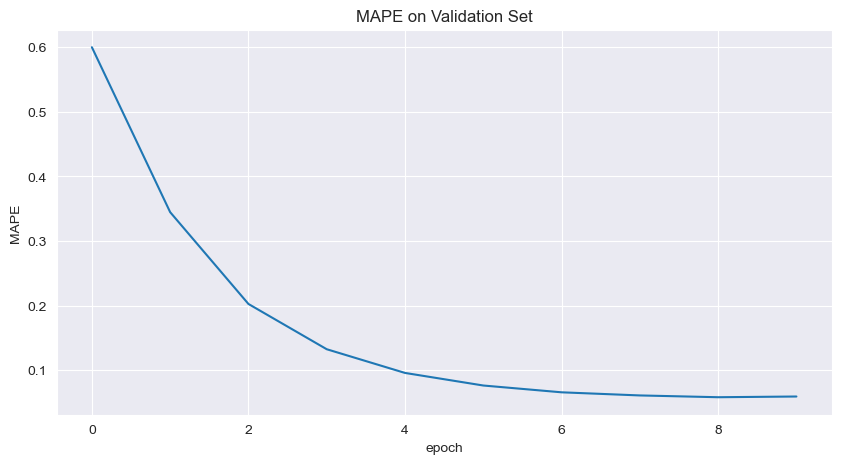

In [32]:
model_evaluation_plots('002-rnn')

In [30]:
model_evaluation_numeric('001-rnn')

Model: 001-rnn
Best Epoch: 9
Training Loss at Best Epoch: 28924.8203
Validation MAPE at Best Epoch: 0.0571
Mean Validation MAPE: 0.1690
Standard Deviation of Validation MAPE: 0.1671
Worst-case Validation MAPE: 0.5996


(9, 28924.8203125, 0.05706493929028511)

In [31]:
model_comparison_table(['001-rnn', '002-rnn'])

Model: 001-rnn
Best Epoch: 9
Training Loss at Best Epoch: 28924.8203
Validation MAPE at Best Epoch: 0.0571
Mean Validation MAPE: 0.1690
Standard Deviation of Validation MAPE: 0.1671
Worst-case Validation MAPE: 0.5996
Model: 002-rnn
Best Epoch: 9
Training Loss at Best Epoch: 28620.1113
Validation MAPE at Best Epoch: 0.0595
Mean Validation MAPE: 0.1698
Standard Deviation of Validation MAPE: 0.1671
Worst-case Validation MAPE: 0.5999
     model  best_epoch     best_loss  best_mape
0  001-rnn           9  28924.820312   0.057065
1  002-rnn           9  28620.111328   0.059513


,model,best_epoch,best_loss,best_mape
0,001-rnn,9,28924.820312,0.057065
1,002-rnn,9,28620.111328,0.059513
